Este exemplo considera:

i) Treinamento de um classificador

ii) Avaliação do modelo por meio de validação cruzada com T folds (T partições de dados)

iii) Parametrização com busca via GridSearch() em base de dados de validação

iv) Uso de diferentes técnicas de AM para a geração do classificador (Learners)

v) Base de dados Glass (exemplo de base desbalanceada)

vi) Uso de diferentes métricas de avaliação

In [ ]:


# Importar bibliotecas necessárias
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.datasets import load_breast_cancer, load_digits, load_wine
from sklearn.model_selection import train_test_split

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb



In [ ]:
import pandas as pd
import numpy as np

# load attribute names
att=pd.read_csv('glass.csv', index_col=-1, nrows=0).columns.tolist()
print(att)

# load the data
dataset = np.loadtxt('glass.csv', delimiter=",", skiprows=1)
X = dataset[:,0:9]
y = dataset[:,9]
print(X)


['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
[[ 1.52101 13.64     4.49    ...  8.75     0.       0.     ]
 [ 1.51761 13.89     3.6     ...  7.83     0.       0.     ]
 [ 1.51618 13.53     3.55    ...  7.78     0.       0.     ]
 ...
 [ 1.52065 14.36     0.      ...  8.44     1.64     0.     ]
 [ 1.51651 14.38     0.      ...  8.48     1.57     0.     ]
 [ 1.51711 14.23     0.      ...  8.62     1.67     0.     ]]


In [ ]:
# Validação cruzada
from sklearn.model_selection import train_test_split, GridSearchCV


# Separando da base original uma parte para validação
X,x_val,y,y_val=train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Declara o modelo
#clf=KNeighborsClassifier()
#clf=LogisticRegression(max_iter=300)
#clf=SVC(probability=True, random_state=42)
clf=DecisionTreeClassifier()
#clf=LinearDiscriminantAnalysis()
#clf=RandomForestClassifier(random_state=46)
#clf=GaussianNB()
#clf=MLPClassifier(max_iter=300, early_stopping=False, solver='adam')

# Define ensembles (homogeneous and heterogeneous)
#clf = RandomForestClassifier(random_state=0)

# parâmetros que o GridSearch utilizará Logistic Regression)
param_lr=[{
           'solver': ['liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],

             }]

             # parâmetros que o GridSearch utilizará Logistic Regression)
param_lda=[{
           'solver': ['svd', 'lsqr', 'eigen'],
           'shrinkage': ['auto', 0.1, 0.3, 0.5, 0.8]
             }]


# parâmetros que o GridSearch utilizará em sua busca (KNN)
param_knn=[{'n_neighbors':[1,3,5],
             'weights': ['uniform', 'distance'],
             'p':[1,2]}]

# parâmetros que o GridSearch utilizará em sua busca (KNN)
param_svc=[{'C':[1,5,10,50],
             'kernel': ['rbf', 'poly', 'linear'],
             'gamma':[0.1, 0.001, 'scale']}]

# parâmetros para árvore de classificação (DecisionTree)
param_tree=[{'criterion':['gini', 'entropy', 'log_loss'],
             'max_depth': [None, 5, 10],
             'min_samples_split':[2, 5],
             'splitter':['random', 'best']}]

# parâmetros para árvore de classificação (DecisionTree)
param_RF=[{'criterion':['gini', 'entropy'],
           'max_depth': [5, 10],
           'min_samples_split':[2, 5],
           'max_samples': [0.3, 0.5],
           'n_estimators':[10, 50, 100, 200]}]

# parâmetros para MLP (Rede Neural Artificial - MultiLayer Perceptron)
param_MLP=[{'hidden_layer_sizes':[8, (8, 4), 10],
             'learning_rate': ['constant', 'invscaling'],
             'learning_rate_init':[0.01, 0.001, 0.0001],
             'activation':['relu', 'logistic', 'tanh'],
             'random_state':[10, 46, 37]}]

# parâmetros Naive Bayes
param_NB=[{'var_smoothing':[1e-09]}]

# Execução do GridSearch
gs=GridSearchCV(clf, param_tree, scoring='accuracy', cv=3, n_jobs=-1)
gs.fit(x_val, y_val)

# Mostrando a tabela de resultados do GrifSearch (opcional)
from tabulate import tabulate
import pandas as pd
df=gs.cv_results_
print(tabulate(df, headers='keys', tablefmt='psql'))
print("Melhores parâmetros encontrados: ", gs.best_params_)

# Recuperando os melhores resultados
clf=gs.best_estimator_



#dec = clf.decision_function(X[0].reshape(1, -1))
#dec.shape[1] # 6 classes: 4*3/2 = 6



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


+-----------------+----------------+-------------------+------------------+-------------------+-------------------+---------------------------+------------------+--------------------------------------------------------------------------------------------+---------------------+---------------------+---------------------+-------------------+------------------+-------------------+
|   mean_fit_time |   std_fit_time |   mean_score_time |   std_score_time | param_criterion   |   param_max_depth |   param_min_samples_split | param_splitter   | params                                                                                     |   split0_test_score |   split1_test_score |   split2_test_score |   mean_test_score |   std_test_score |   rank_test_score |
|-----------------+----------------+-------------------+------------------+-------------------+-------------------+---------------------------+------------------+----------------------------------------------------------------------------

Acurácia média: 0.614
Desvio padrão: 0.056
Precision: 0.595
Recall: 0.614
f1: 0.592
Matriz de Confusão


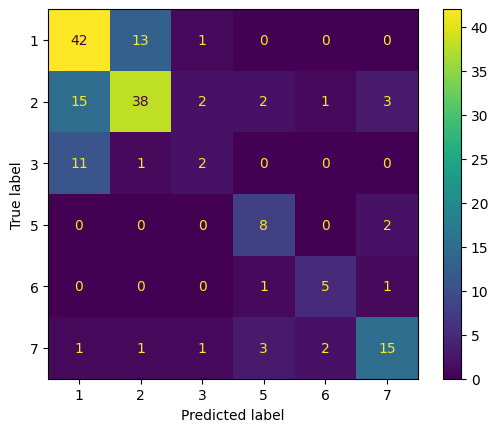

In [ ]:
# Usando validação cruzada com T=5 folds
result=model_selection.cross_val_score(clf, X, y, cv=5)
print("Acurácia média: %.3f" % result.mean())
print("Desvio padrão: %.3f" % result.std())

# Calculando a predição para cada exempolo de teste
y_pred=model_selection.cross_val_predict(clf, X, y, cv=5)

# Calculando a predição para cada exemplo de teste
y_pred_proba=model_selection.cross_val_predict(clf, X, y, cv=5, method='predict_proba')

# Calcular precisão
precision=precision_score(y, y_pred, average='macro')

# Calcular revocação
recall=recall_score(y, y_pred, average='macro')

# Calcular revocação
f1=f1_score(y, y_pred, average='macro')

print("Precision: %.3f" % precision)
print("Recall: %.3f" % recall)
print("f1: %.3f" % f1)

print("Matriz de Confusão")
matrix=confusion_matrix(y, y_pred)
#print(matrix)
disp=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=['1', '2', '3', '5', '6', '7'])
disp.plot()

#print(clf.feature_importances_)

[0.1476135  0.06441137 0.16076492 0.13443851 0.08671597 0.06789528
 0.10515814 0.20092998 0.03207233]


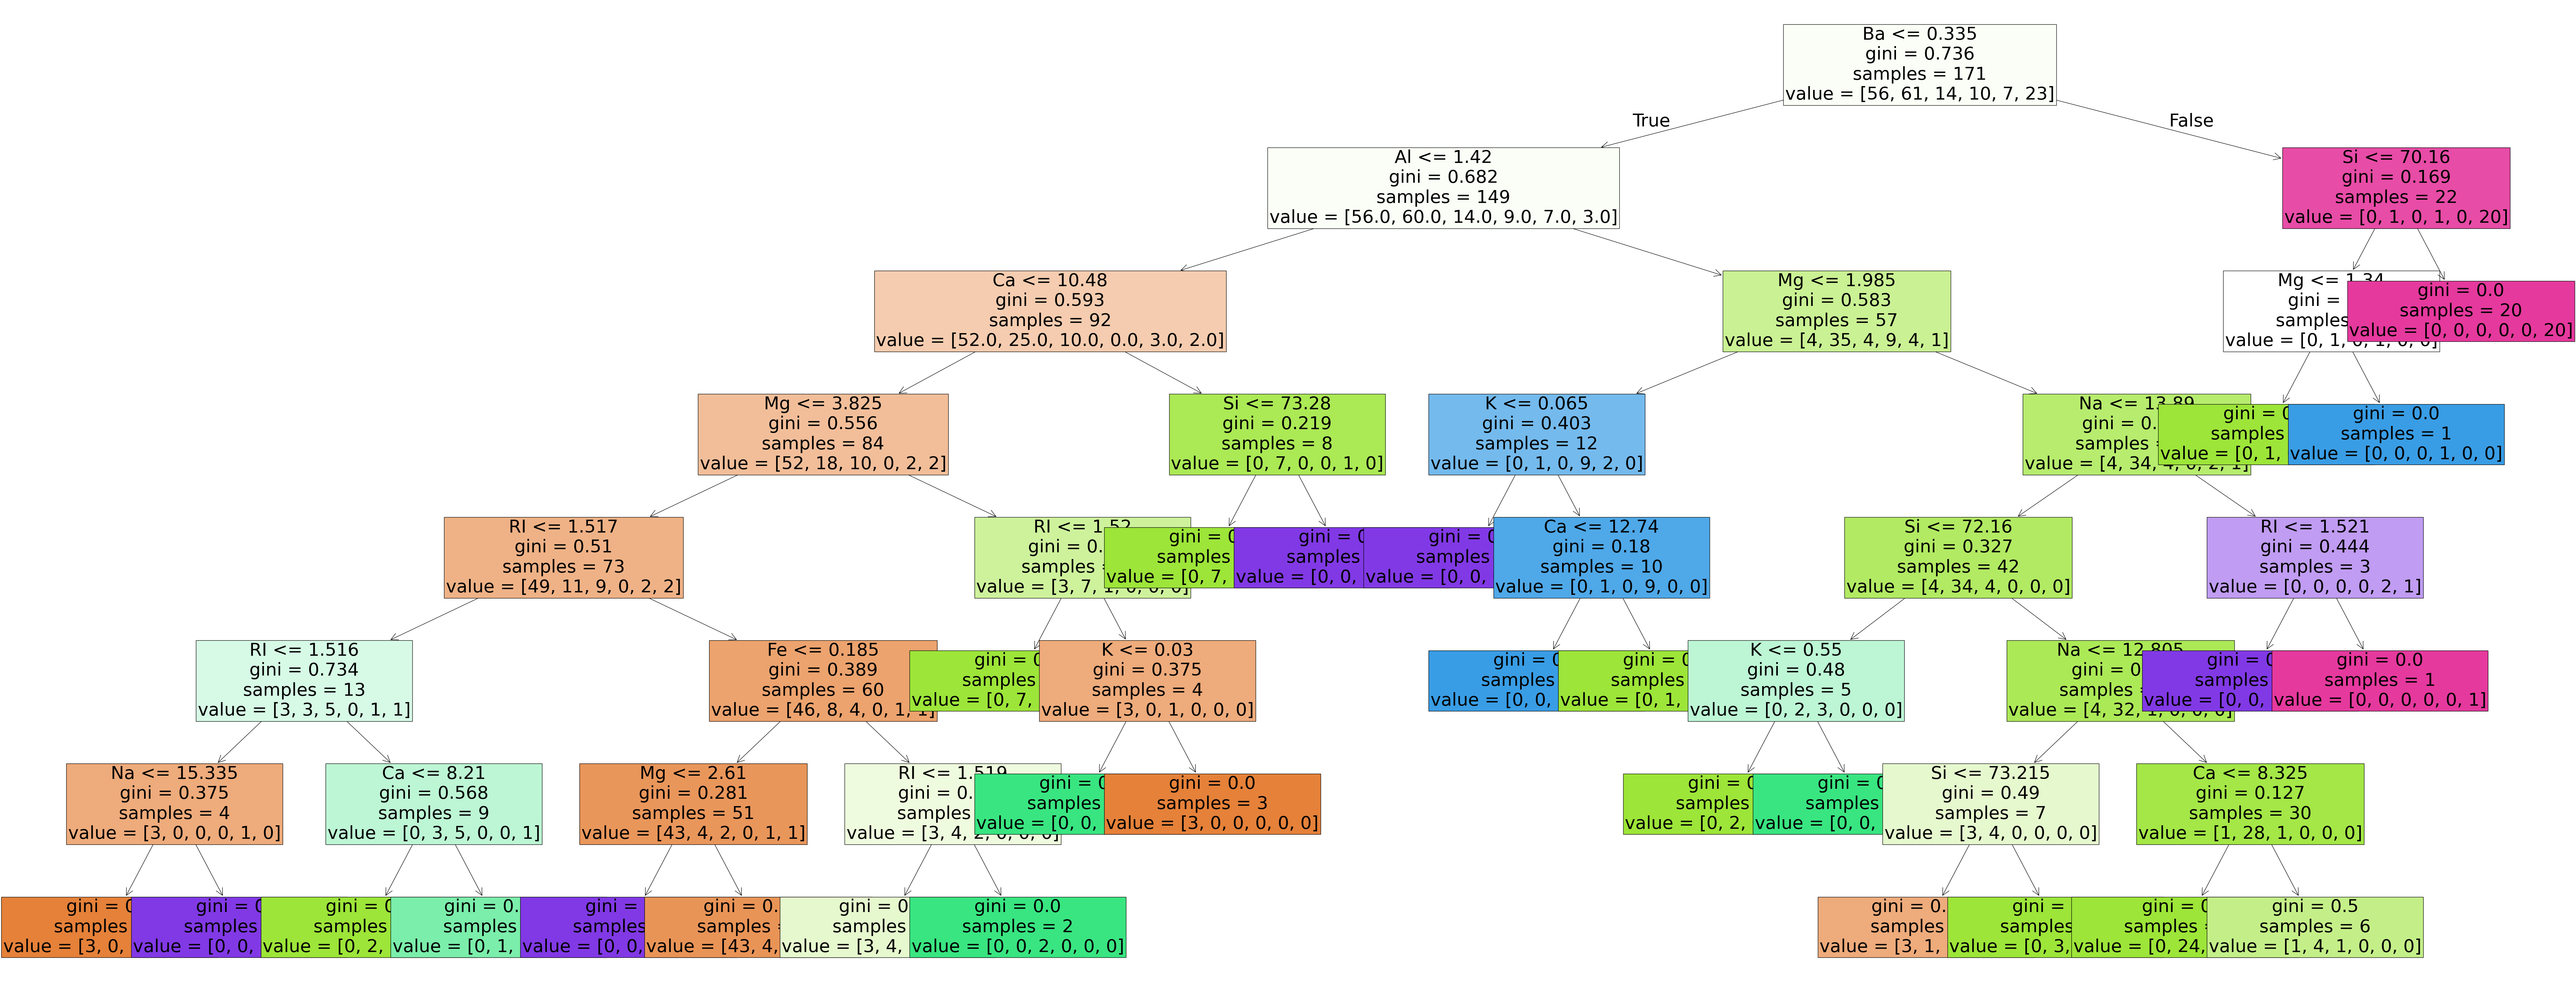

In [ ]:
# plotando a árvore após treinamento com a base toda (EXECUTE SOMENTE PARA ÁRVORE)
from sklearn import tree
clf=DecisionTreeClassifier(max_depth=7, random_state=42)
#clf=gs.best_estimator_
clf.fit(X,y)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree

_, ax = plt.subplots(figsize=(100,40))
x=tree.plot_tree(clf, feature_names=att, filled=True, ax=ax, fontsize=40)

print(clf.feature_importances_)